DD2437 - Artificial Neural Networks and Deep Architectures
Lab assignement 1b - Learning with backpropagation and generalisation in MLP

In [5]:
import numpy as np

a = np.array([1, 2, 3, 4, 5])
b = np.array([1, 2, 3, 4, 5])
1/np.exp(a)*2 + 1
a*b

array([ 1,  4,  9, 16, 25])

PART I
3.1 - Classification and regression with a two-layer perceptron

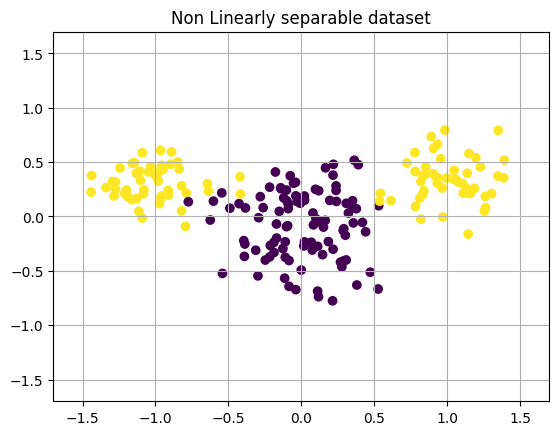

In [6]:
# 3.1.1 - Classification of linearly non-separable data

import random as rd
import numpy as np
import random
from src import *

seed = random.seed(1)

n = 100
mA = np.array([[1.0], [0.3]])
mB = np.array([[0.0], [-0.1]])
sigmaA = 0.2
sigmaB = 0.3

type_data = "nonlinear"
rule = "delta"
rng = np.random.default_rng()
plt.figure()
plt.title("Non Linearly separable dataset")
X, T = new_data(mA, mB, sigmaA, sigmaB, n, type_data, rng)
plot_data(X,T)


In [7]:
patterns = X
ndata = n
targets = T
Nhidden = 5
alpha = 0.9
eta = 0.01
epochs_nb = 100

mse, accuraciesA, accuraciesB,W,V = backprop_training(patterns, ndata, targets, Nhidden, alpha, eta, epochs_nb, True)

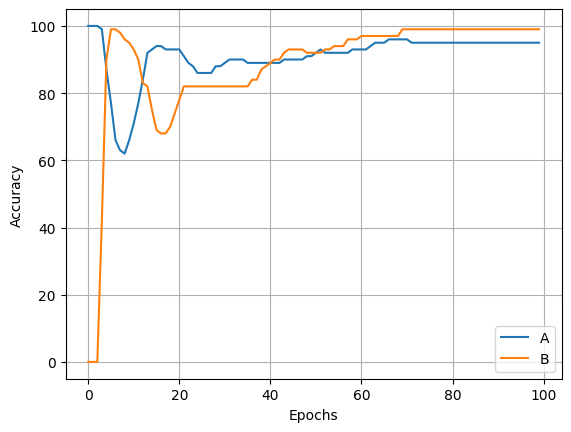

In [8]:
plt.figure()
plt.plot(range(epochs_nb), accuraciesA)
plt.plot(range(epochs_nb), accuraciesB)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.legend(["A", "B"])
plt.show()

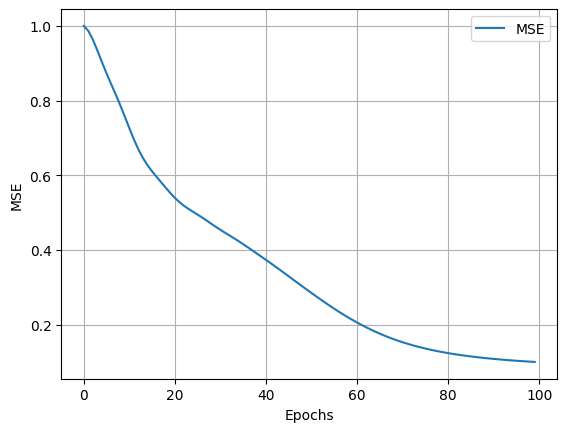

In [9]:
plt.figure()
plt.plot(range(epochs_nb), mse)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.grid()
plt.legend(["MSE"])
plt.show()

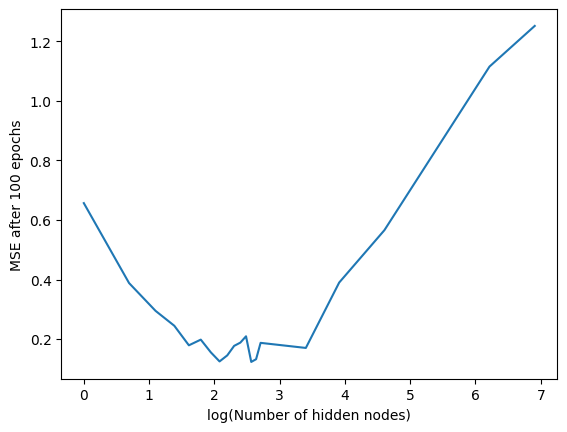

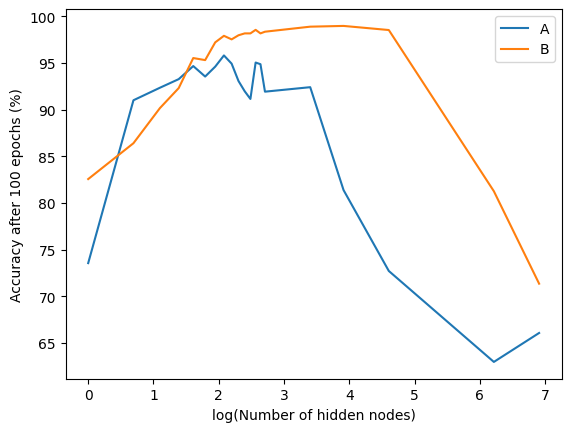

In [10]:
#Question 1

patterns = X
ndata = n
targets = T
alpha = 0.9
eta = 0.01
epochs_nb = 100
iterations = 50

N_hidden = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15, 30,50,100,500, 1000]
the_mse = []
the_accuraciesA = []
the_accuraciesB = []

for elt in N_hidden:
    sum_mse = 0
    sum_accuraciesA = 0
    sum_accuraciesB = 0
    for i in range(iterations):
        mse, accuraciesA, accuraciesB, W, V = backprop_training(patterns, ndata, targets, elt, alpha, eta, epochs_nb, True)
        sum_mse+=mse[-1]
        sum_accuraciesA += accuraciesA[-1]
        sum_accuraciesB += accuraciesB[-1]

    the_mse.append(sum_mse/iterations)
    the_accuraciesA.append(sum_accuraciesA/iterations)
    the_accuraciesB.append(sum_accuraciesB/iterations)


plt.figure()
plt.plot(np.log(N_hidden),the_mse)
plt.xlabel('log(Number of hidden nodes)')
plt.ylabel('MSE after 100 epochs')

plt.figure()
plt.plot(np.log(N_hidden),the_accuraciesA)
plt.plot(np.log(N_hidden),the_accuraciesB)
plt.xlabel('log(Number of hidden nodes)')
plt.ylabel('Accuracy after 100 epochs (%)')
plt.legend(['A','B'])

plt.show()


(3, 150)
[[100.   0.]
 [100.   0.]]
[[100.   0.]
 [100.   0.]]
[[100.   0.]
 [100.   0.]]
[[100.   0.]
 [100.   0.]]
[[100.   0.]
 [100.   0.]]
[[100.   0.]
 [100.   0.]]
[[100.   0.]
 [100.   0.]]
[[100.   0.]
 [100.   0.]]
[[100.   0.]
 [100.   0.]]
[[100.   0.]
 [100.   0.]]
[[100.   0.]
 [100.   0.]]
[[100.   0.]
 [100.   0.]]
[[100.   0.]
 [ 96.   4.]]
[[100.   0.]
 [ 84.  16.]]
[[100.   0.]
 [ 76.  24.]]
[[100.   0.]
 [ 64.  36.]]
[[100.   0.]
 [ 60.  40.]]
[[96.  4.]
 [60. 40.]]
[[96.  4.]
 [60. 40.]]
[[96.  4.]
 [60. 40.]]
[[96.  4.]
 [60. 40.]]
[[92.  8.]
 [56. 44.]]
[[88. 12.]
 [56. 44.]]
[[84. 16.]
 [56. 44.]]
[[84. 16.]
 [56. 44.]]
[[84. 16.]
 [56. 44.]]
[[84. 16.]
 [56. 44.]]
[[84. 16.]
 [56. 44.]]
[[84. 16.]
 [56. 44.]]
[[84. 16.]
 [56. 44.]]
[[84. 16.]
 [56. 44.]]
[[88. 12.]
 [56. 44.]]
[[92.  8.]
 [56. 44.]]
[[92.  8.]
 [56. 44.]]
[[96.  4.]
 [60. 40.]]
[[96.  4.]
 [60. 40.]]
[[96.  4.]
 [60. 40.]]
[[96.  4.]
 [60. 40.]]
[[96.  4.]
 [60. 40.]]
[[96.  4.]
 [60. 40.]]
[[9

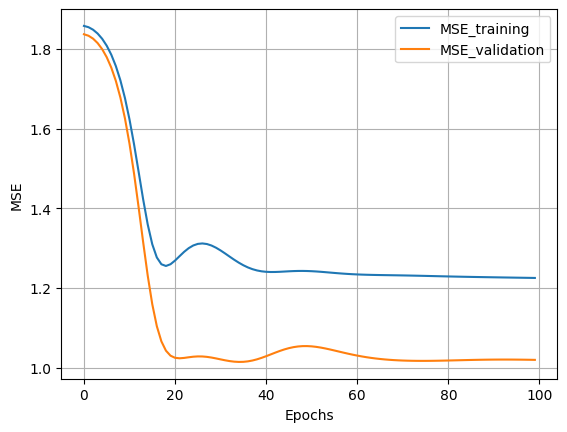

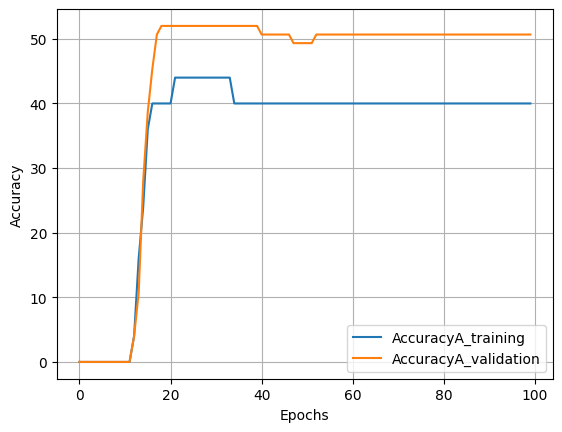

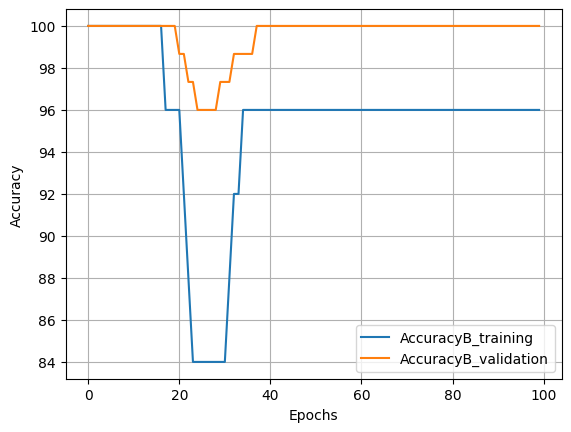

In [14]:
#Question 2
import random as rd
import numpy as np
import random
from src import *

seed = random.seed(1)

n = 100
ndata = n
Nhidden = 15
alpha = 0.9
eta = 0.01
epochs_nb = 100
mA = np.array([[1.0], [0.3]])
mB = np.array([[0.0], [-0.1]])
sigmaA = 0.2
sigmaB = 0.3

type_data = "nonlinear"
rule = "delta"
rng = np.random.default_rng()

"""#--------------------------

N_hidden = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15, 30,50,100,500, 1000]

the_mse_t = []
the_mse_v = []
the_accuracies_A_t = []
the_accuracies_B_t = []
the_accuracies_A_v = []
the_accuracies_B_v = []



training, T_training, validation, T_validation= subsample(n, 1, rng, sigmaA, sigmaB, mA, mB)
print(validation.shape)

train_set = training
validation_set = validation
train_targets = T_training
validation_targets = T_validation

for elt in N_hidden:

    sum_mse_t = 0
    sum_mse_v = 0
    sum_accuraciesA_t = 0
    sum_accuraciesB_t = 0
    sum_accuraciesA_v = 0
    sum_accuraciesB_v = 0



    for i in range(iterations):
        mse_all, accuracies_all, W, V = backprop_trainvalide(train_set, validation_set, ndata, train_targets, validation_targets, Nhidden, alpha, eta, epochs_nb)
        sum_mse_t += mse_all[0][-1]
        sum_mse_v += mse_all[1][-1]
        sum_accuraciesA_t += accuracies_all[0][0][-1]
        sum_accuraciesB_t += accuracies_all[0][1][-1]
        sum_accuraciesA_v += accuracies_all[1][0][-1]
        sum_accuraciesB_v += accuracies_all[1][1][-1]
        
    the_mse_t.append(sum_mse_t/iterations)
    the_mse_v.append(sum_mse_v/iterations)
    the_accuracies_A_t.append(sum_accuraciesA_t/iterations)
    the_accuracies_B_t.append(sum_accuraciesB_t/iterations)
    the_accuracies_A_v.append(sum_accuraciesA_v/iterations)
    the_accuracies_B_v.append(sum_accuraciesB_v/iterations)
    
      
        
        """

#scenario 1


training, T_training, validation, T_validation= subsample(n, 1, rng, sigmaA, sigmaB, mA, mB)
print(validation.shape)

train_set = training
validation_set = validation
train_targets = T_training
validation_targets = T_validation
mse_all, accuracies_all, W, V = backprop_trainvalide(train_set, validation_set, ndata, train_targets, validation_targets, Nhidden, alpha, eta, epochs_nb)

mse_t, mse_v = mse_all
((accuraciesA_t, accuraciesB_t), (accuraciesA_v, accuraciesB_v)) = accuracies_all

plt.figure()
plt.plot(range(epochs_nb), mse_t)
plt.plot(range(epochs_nb), mse_v)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.grid()
plt.legend(["MSE_training","MSE_validation"])
plt.show()

plt.figure()
plt.plot(range(epochs_nb), accuraciesA_t)
plt.plot(range(epochs_nb), accuraciesA_v)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend(["AccuracyA_training","AccuracyA_validation"])
plt.show()

plt.figure()
plt.plot(range(epochs_nb), accuraciesB_t)
plt.plot(range(epochs_nb), accuraciesB_v)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend(["AccuracyB_training","AccuracyB_validation"])
plt.show()


(3, 150)
[[ 0.  0.]
 [50. 50.]]
[[ 0.  0.]
 [48. 52.]]
[[ 0.  0.]
 [44. 56.]]
[[ 0.  0.]
 [24. 76.]]
[[ 0.  0.]
 [10. 90.]]
[[  0.   0.]
 [  0. 100.]]
[[  0.   0.]
 [  0. 100.]]
[[  0.   0.]
 [  0. 100.]]
[[  0.   0.]
 [  0. 100.]]
[[  0.   0.]
 [  0. 100.]]
[[  0.   0.]
 [  0. 100.]]
[[  0.   0.]
 [  0. 100.]]
[[  0.   0.]
 [  0. 100.]]
[[  0.   0.]
 [  0. 100.]]
[[  0.   0.]
 [  0. 100.]]
[[  0.   0.]
 [  0. 100.]]
[[  0.   0.]
 [  0. 100.]]
[[  0.   0.]
 [  0. 100.]]
[[  0.   0.]
 [  0. 100.]]
[[  0.   0.]
 [  0. 100.]]
[[  0.   0.]
 [  0. 100.]]
[[  0.   0.]
 [  0. 100.]]
[[  0.   0.]
 [  0. 100.]]
[[  0.   0.]
 [  0. 100.]]
[[  0.   0.]
 [  0. 100.]]


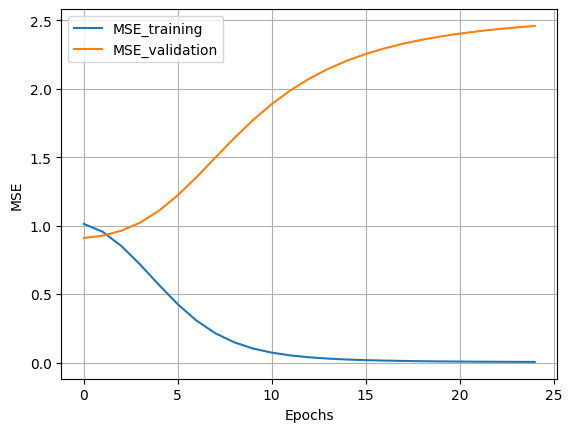

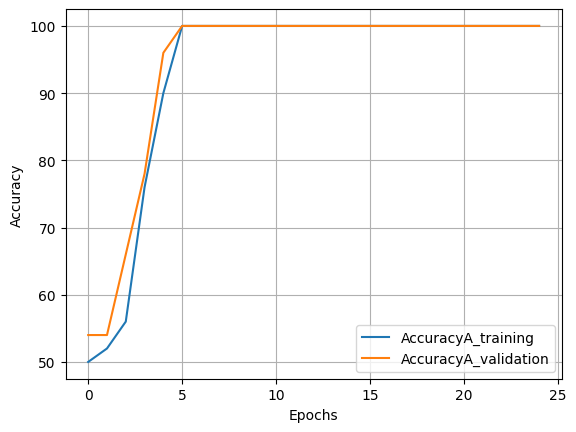

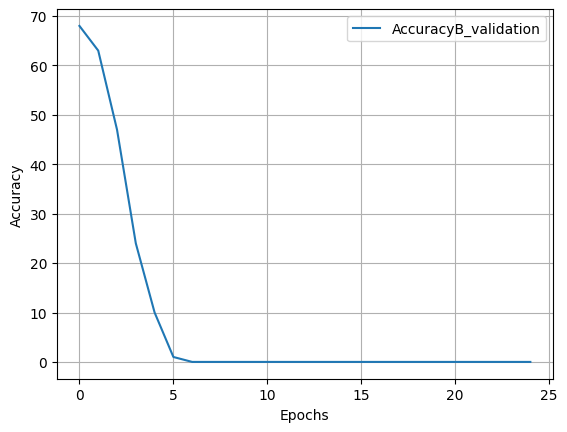

In [15]:
#Question 2
import random as rd
import numpy as np
import random
from src import *

seed = random.seed(1)

n = 100
ndata = n
Nhidden = 5
alpha = 0.9
eta = 0.01
epochs_nb = 25
mA = np.array([[1.0], [0.3]])
mB = np.array([[0.0], [-0.1]])
sigmaA = 0.2
sigmaB = 0.3

type_data = "nonlinear"
rule = "delta"
rng = np.random.default_rng()

#scenario 2


training, T_training, validation, T_validation= subsample(n, 2, rng, sigmaA, sigmaB, mA, mB)
print(validation.shape)

train_set = training
validation_set = validation
train_targets = T_training
validation_targets = T_validation
mse_all, accuracies_all, W, V = backprop_trainvalide(train_set, validation_set, ndata, train_targets, validation_targets, Nhidden, alpha, eta, epochs_nb)

mse_t, mse_v = mse_all
((accuraciesA_t, accuraciesB_t), (accuraciesA_v, accuraciesB_v)) = accuracies_all

plt.figure()
plt.plot(range(epochs_nb), mse_t)
plt.plot(range(epochs_nb), mse_v)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.grid()
plt.legend(["MSE_training","MSE_validation"])
plt.show()

plt.figure()
plt.plot(range(epochs_nb), accuraciesA_t)
plt.plot(range(epochs_nb), accuraciesA_v)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend(["AccuracyA_training","AccuracyA_validation"])
plt.show()

plt.figure()
plt.plot(range(epochs_nb), accuraciesB_v)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend(["AccuracyB_validation"])
plt.show()

[[  0.   0.]
 [  0. 100.]]
[[  0.   0.]
 [  0. 100.]]
[[  0.   0.]
 [  0. 100.]]
[[  0.   0.]
 [  0. 100.]]
[[  0.   0.]
 [  0. 100.]]


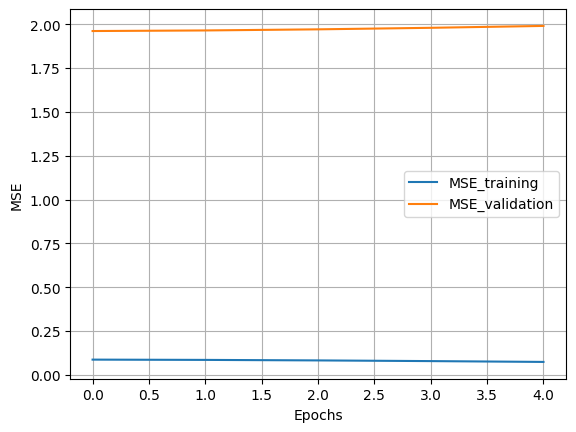

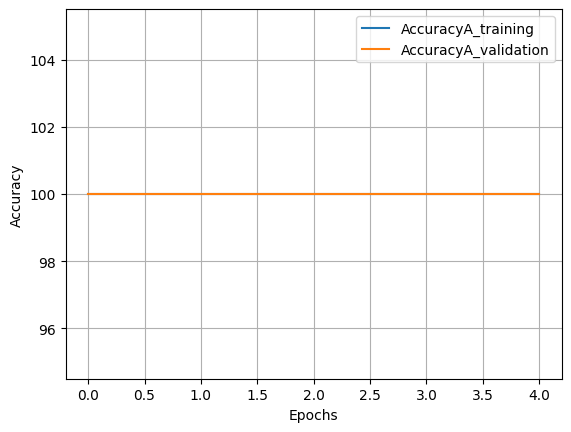

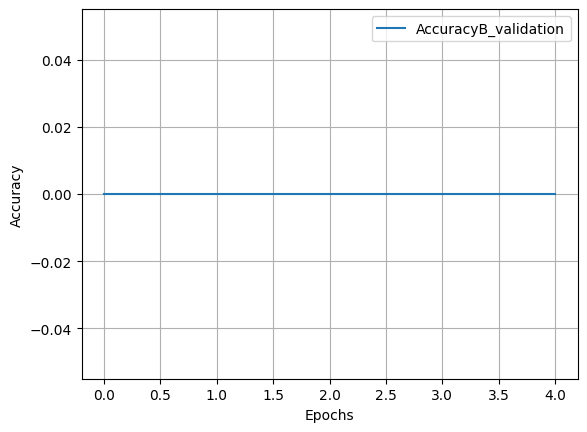

In [16]:
#Question 2
import random as rd
import numpy as np
import random
from src import *

seed = random.seed(1)

n = 100
ndata = n
Nhidden = 5
alpha = 0.9
eta = 0.01
epochs_nb = 5
mA = np.array([[1.0], [0.3]])
mB = np.array([[0.0], [-0.1]])
sigmaA = 0.2
sigmaB = 0.3

type_data = "nonlinear"
rule = "delta"
rng = np.random.default_rng()

#scenario 3


training, T_training, validation, T_validation= subsample(n, 3, rng, sigmaA, sigmaB, mA, mB)


train_set = training
validation_set = validation
train_targets = T_training
validation_targets = T_validation
mse_all, accuracies_all, W, V = backprop_trainvalide(train_set, validation_set, ndata, train_targets, validation_targets, Nhidden, alpha, eta, epochs_nb)

mse_t, mse_v = mse_all
((accuraciesA_t, accuraciesB_t), (accuraciesA_v, accuraciesB_v)) = accuracies_all

plt.figure()
plt.plot(range(epochs_nb), mse_t)
plt.plot(range(epochs_nb), mse_v)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.grid()
plt.legend(["MSE_training","MSE_validation"])
plt.show()

plt.figure()
plt.plot(range(epochs_nb), accuraciesA_t)
plt.plot(range(epochs_nb), accuraciesA_v)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend(["AccuracyA_training","AccuracyA_validation"])
plt.show()

plt.figure()
plt.plot(range(epochs_nb), accuraciesB_v)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend(["AccuracyB_validation"])
plt.show()

In [18]:
#Influence of number of nodes
import random as rd
import numpy as np
import random
from src import *

seed = random.seed(1)

n = 100
ndata = n
Nhidden = 15
alpha = 0.9
eta = 0.01
epochs_nb = 100
mA = np.array([[1.0], [0.3]])
mB = np.array([[0.0], [-0.1]])
sigmaA = 0.2
sigmaB = 0.3

type_data = "nonlinear"
rule = "delta"
rng = np.random.default_rng()



N_hidden = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15, 30,50,100,500, 1000]

the_mse_t = []
the_mse_v = []
the_accuracies_A_t = []
the_accuracies_B_t = []
the_accuracies_A_v = []
the_accuracies_B_v = []



training, T_training, validation, T_validation= subsample(n, 1, rng, sigmaA, sigmaB, mA, mB)
#print(validation.shape)

train_set = training
validation_set = validation
train_targets = T_training
validation_targets = T_validation
iterations = 100

for elt in N_hidden:

    sum_mse_t = 0
    sum_mse_v = 0
    sum_accuraciesA_t = 0
    sum_accuraciesB_t = 0
    sum_accuraciesA_v = 0
    sum_accuraciesB_v = 0



    for i in range(iterations):
        mse_all, accuracies_all, W, V = backprop_trainvalide(train_set, validation_set, ndata, train_targets, validation_targets, elt, alpha, eta, epochs_nb)
        sum_mse_t += mse_all[0][-1]
        sum_mse_v += mse_all[1][-1]
        sum_accuraciesA_t += accuracies_all[0][0][-1]
        sum_accuraciesB_t += accuracies_all[0][1][-1]
        sum_accuraciesA_v += accuracies_all[1][0][-1]
        sum_accuraciesB_v += accuracies_all[1][1][-1]
        
    the_mse_t.append(sum_mse_t/iterations)
    the_mse_v.append(sum_mse_v/iterations)
    the_accuracies_A_t.append(sum_accuraciesA_t/iterations)
    the_accuracies_B_t.append(sum_accuraciesB_t/iterations)
    the_accuracies_A_v.append(sum_accuraciesA_v/iterations)
    the_accuracies_B_v.append(sum_accuraciesB_v/iterations)
    
      

plt.figure()
plt.plot(np.log(N_hidden), the_mse_t)
plt.plot(np.log(N_hidden), the_mse_v)
plt.xlabel('log(number of hidden nodes)')
plt.ylabel('MSE')
plt.grid()
plt.legend(["MSE_training","MSE_validation"])
plt.show()

plt.figure()
plt.plot(np.log(N_hidden), the_accuracies_A_t)
plt.plot(np.log(N_hidden), the_accuracies_A_v)
plt.xlabel('log(number of hidden nodes)')
plt.ylabel('Accuracy')
plt.grid()
plt.legend(["AccuracyA_training","AccuracyA_validation"])
plt.show()

plt.figure()
plt.plot(np.log(N_hidden), the_accuracies_B_t)
plt.plot(np.log(N_hidden), the_accuracies_B_v)
plt.xlabel('log(number of hidden nodes)')
plt.ylabel('Accuracy')
plt.grid()
plt.legend(["AccuracyB_training","AccuracyB_validation"])
plt.show() 
    


[[100.   0.]
 [100.   0.]]
[[100.   0.]
 [100.   0.]]
[[100.   0.]
 [100.   0.]]
[[100.   0.]
 [100.   0.]]
[[100.   0.]
 [100.   0.]]
[[100.   0.]
 [100.   0.]]
[[100.   0.]
 [100.   0.]]
[[100.   0.]
 [100.   0.]]
[[100.   0.]
 [100.   0.]]
[[100.   0.]
 [100.   0.]]
[[100.   0.]
 [100.   0.]]
[[100.   0.]
 [100.   0.]]
[[100.   0.]
 [100.   0.]]
[[100.   0.]
 [100.   0.]]
[[100.   0.]
 [100.   0.]]
[[100.   0.]
 [ 56.  44.]]
[[72. 28.]
 [56. 44.]]
[[ 8. 92.]
 [24. 76.]]
[[  0. 100.]
 [  0. 100.]]
[[  0. 100.]
 [  0. 100.]]
[[  0. 100.]
 [  0. 100.]]
[[  0. 100.]
 [  0. 100.]]
[[  0. 100.]
 [  0. 100.]]
[[  0. 100.]
 [  0. 100.]]
[[  0. 100.]
 [  0. 100.]]
[[  0. 100.]
 [  0. 100.]]
[[  0. 100.]
 [  0. 100.]]
[[  0. 100.]
 [  0. 100.]]
[[  0. 100.]
 [  0. 100.]]
[[  0. 100.]
 [  0. 100.]]
[[  0. 100.]
 [  0. 100.]]
[[  0. 100.]
 [  0. 100.]]
[[  0. 100.]
 [  0. 100.]]
[[  0. 100.]
 [  0. 100.]]
[[  0. 100.]
 [  0. 100.]]
[[  0. 100.]
 [  0. 100.]]
[[  0. 100.]
 [  0. 100.]]
[[  8.  9

KeyboardInterrupt: 

In [ ]:
#

In [ ]:
from src import *
#3.1.3 : Function approximation

# Function plot
x = np.arange(-5, 5, 0.5)
y = np.arange(-5, 5, 0.5)
Xx, Yy = np.meshgrid(x, y)

f = lambda x,y: np.exp(-(x**2+y**2)/10)-0.5
Zz = f(Xx, Yy)

# 2D
fig = plt.figure(figsize=(12.5,5))
fig2d = fig.add_subplot(1,2,1)
fig2d.contourf(Xx, Yy, Zz)
fig2d.set_xlabel("X1")
fig2d.set_ylabel("X2")

# 3D
fig3d = fig.add_subplot(1, 2, 2, projection='3d')
fig3d.plot_surface(Xx, Yy, Zz)
fig3d.set_xlabel("X1")
fig3d.set_ylabel("X2")
fig3d.set_zlabel("f")


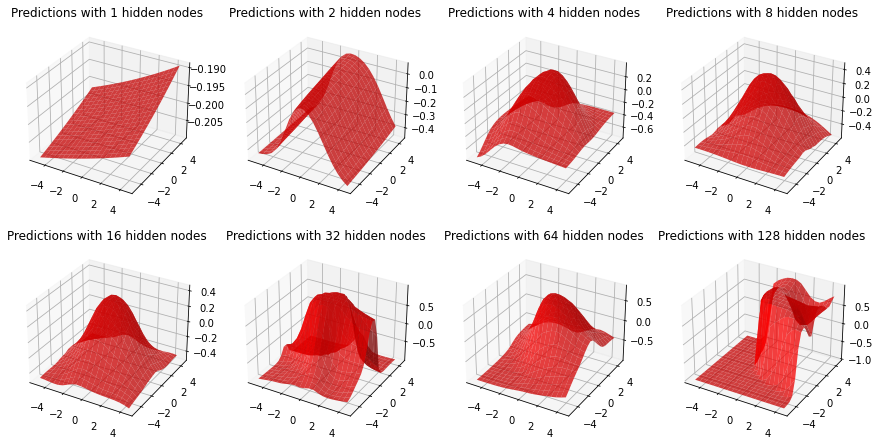

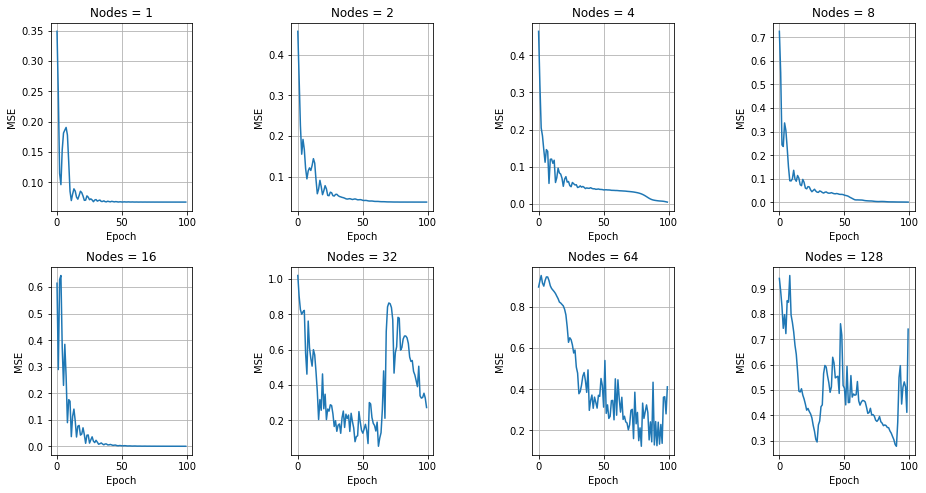

In [ ]:
# Learning of function
import numpy as np
import copy
import matplotlib.pyplot as plt
from src import *

# Function plot
x = np.arange(-5, 5, 0.5)
y = np.arange(-5, 5, 0.5)
Xx, Yy = np.meshgrid(x, y)

f = lambda x,y: np.exp(-(x**2+y**2)/10)-0.5
Zz = f(Xx, Yy)

ndata = int(len(x)*len(y))
targets = np.reshape(Zz,ndata)
patterns = np.vstack((Xx.reshape(1, ndata), Yy.reshape(1, ndata), np.ones((1,ndata)))) #adding also the bias
#VSTACK is like concatenate but it does it vertically



eta = 0.05
epochs_nb = 100

n_hidden_list = [1,2,4,8,16,32,64,128]
fig = plt.figure(figsize=(15,7.5))
plot = 1
momentum = 0.9 #alpha value

MSE=[]
for n_hidden in n_hidden_list:
    
    # Training with backpropagation
    mse,_,_,W,V = backprop_training(patterns, ndata, targets, n_hidden, momentum, eta, epochs_nb, False)
    out = forward_pass(V, W, patterns)
    MSE.append(mse)

    # Plot the predictions in 3D
    ax3d = fig.add_subplot(2, 4, plot, projection='3d')
    plot += 1
    ax3d.plot_surface(Xx, Yy, out.reshape(len(x),len(y)), color="red", alpha=0.75, label="Predictions")
    ax3d.set_title("Predictions with "+str(n_hidden)+" hidden nodes")


plt.figure(figsize=(15,7.5))
for i in range(len(n_hidden_list)):
    plt.subplot(2, 4, i+1)
    plt.plot(range(len(MSE[i])),MSE[i])
    plt.grid(True)
    plt.xlabel("Epoch")
    plt.ylabel("MSE")
    plt.title('Nodes = '+str(n_hidden_list[i]))
plt.subplots_adjust(left=0.1, 
                    bottom=0.1,  
                    right=0.9,  
                    top=0.9,  
                    wspace=0.7,  
                    hspace=0.3) 

In [ ]:
patterns_used = [[1,2,3],[1,2,3]]
targets_used = [1,2,3]

random.seed(0)
random.shuffle(patterns_used[0])
random.seed(0)
random.shuffle(patterns_used[1])
random.seed(0)
random.shuffle(targets_used)
print(patterns_used)
print(targets_used)

0.8
0.6
0.4
0.2


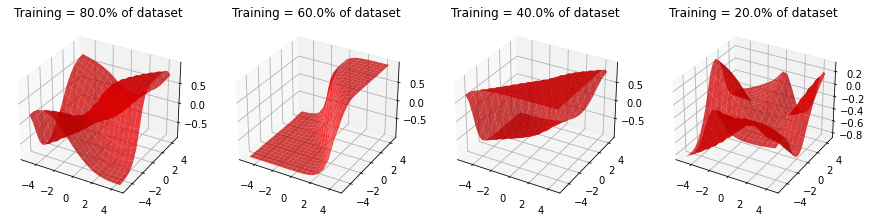

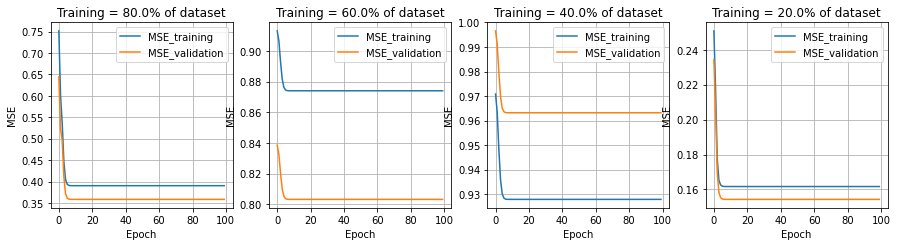

In [ ]:
# Learning of function - Generalisation
from src import *
import numpy as np
import copy

# Function plot
x = np.arange(-5, 5, 0.5)
y = np.arange(-5, 5, 0.5)
Xx, Yy = np.meshgrid(x, y)

f = lambda x,y: np.exp(-(x**2+y**2)/10)-0.5
Zz = f(Xx, Yy)
plot = 1
MSE = []

ndata = int(len(x)*len(y))
targets = np.reshape(Zz,ndata)
patterns = np.vstack((Xx.reshape(1, ndata), Yy.reshape(1, ndata), np.ones((1,ndata))))
#VSTACK is like concatenate but it does it vertically


sampling = [0.8, 0.6, 0.4, 0.2]
fig = plt.figure(figsize=(15,7.5))

for i in range(len(sampling)):
    print(sampling[i])

    patterns_copy = copy.deepcopy(patterns)
    targets_copy = copy.deepcopy(targets)

    patterns_training, targets_training, patterns_validation, targets_validation = subsample_function_approx(patterns_copy, targets_copy, sampling[i])

    #print(len(patterns[0]))
    #print(len(patterns_validation[0]))
    #print(len(patterns_validation[1]))
    #print(len(patterns_training[0]))
    #print(len(patterns_training[1]))
    #print(len(patterns_training[2]))
    #print(len(targets_validation))
    #print(len(targets_training))


    nsamp = int(len(patterns)/5)
    eta = 0.04
    epochs_nb = 100

    n_hidden = 16
    momentum = 0.9 #alpha value


        
    # Training with backpropagation
    mse,W,V = backprop_trainvalide_funct_approx(patterns_training, patterns_validation, ndata, targets_training, targets_validation, n_hidden, momentum, eta, epochs_nb)
    out = forward_pass(V, W, patterns)
    MSE.append(mse)

    


    # Plot the predictions in 3D
    
    ax3d = fig.add_subplot(1, 4, plot, projection='3d')
    plot += 1
    ax3d.plot_surface(Xx, Yy, Zz)
    ax3d.plot_surface(Xx, Yy, out.reshape(len(x),len(y)), color="red", alpha=0.75, label="Predictions")
    ax3d.set_title('Training = '+ str(100*sampling[i])+'% of dataset')

    """plt.figure()
    plt.subplot(2, 4)
    plt.plot(range(len(MSE[i])),MSE[i])
    plt.grid(True)
    plt.xlabel("Epoch")
    plt.ylabel("MSE")
    plt.plot(range(epochs_nb),mse_t)
    plt.plot(range(epochs_nb),mse_v)
    plt.legend(['MSE_training','MSE_validation'])
    plt.xlabel('Epochs')
    plt.ylabel('MSE')

    plt.show()"""

plt.figure(figsize=(15,7.5))
for i in range(len(sampling)):
    pourcentage = 100*sampling[i]
    (mse_t,mse_v) = MSE[i]
    plt.subplot(2, 4, i+1)
    plt.plot(range(len(mse_t)),mse_t)
    plt.plot(range(len(mse_v)),mse_v)
    plt.legend(['MSE_training','MSE_validation'])
    plt.title('Training = '+ str(100*sampling[i])+'% of dataset')
    plt.grid(True)
    plt.xlabel("Epoch")
    plt.ylabel("MSE")
    #print(mse_v[-1])



Text(0, 0.5, 'x(t)')

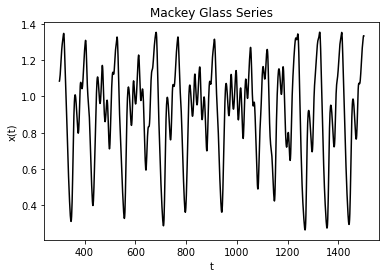

In [ ]:
# Part 2
import numpy as np 
import matplotlib.pyplot as plt


def mackey_glass(max_time, beta=0.2, gamma=0.1, n=10, theta=25):
    x = np.empty(max_time+1)
    x[0] = 1.5
    for t in range(1, max_time+1):
        x_1 = x[t-1]
        x_theta = 0 if t<theta else x[t-theta]
        x[t] = x_1+(beta*x_theta)/(1+x_theta**n)-gamma*x_1
    return x

t = np.arange(301, 1501)
x = mackey_glass(1506)
plt.plot(t, x[t], 'black')
plt.title("Mackey Glass Series")
plt.xlabel("t")
plt.ylabel("x(t)")


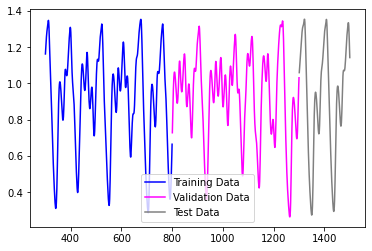

In [ ]:
patterns = np.array([x[t-lag] for lag in [20,15,10,5,0]])
targets = x[t+5]
n_train = 500
n_val = 1000
n_test = 1200
patterns_train, targets_train = patterns[:,0:n_train], targets[0:n_train].reshape(1, n_train)
patterns_val, targets_val  = patterns[:,n_train:n_val], targets[n_train:n_val].reshape(1, n_val-n_train)
patterns_test, targets_test  = patterns[:,n_val:n_test], targets[n_val:n_test].reshape(1, n_test-n_val)

plt.plot(t[:n_train], targets_train[0,:], label="Training Data", color='blue')
plt.plot(t[n_train:n_val], targets_val[0,:], label="Validation Data", color='magenta')
plt.plot(t[n_val:n_test], targets_test[0,:], label="Test Data", color='gray')
plt.legend()

In [ ]:
import torch 
import torch.nn as nn 

class Neural_Net(nn.Module):
    # Define the network
    def __init__(self):
        super(Neural_Net, self).__init__()

        self.layer1 = nn.Linear(in_features=5, out_features=4, bias=True)  # Hidden Layer 1
        self.layer2 = nn.Linear(in_features=4, out_features=4, bias=True)  # Hidden Layer 2
        self.layer3 = nn.Linear(in_features=4, out_features=1, bias=True)  # Layer Out

        self.layer1_activation = nn.Sigmoid()  # Sigmoidal activation for hidden layer 1
        self.layer2_activation = nn.Sigmoid()  # Sigmoidal activation for hidden layer 2

    def forward(self, x):
        # First layer
        y1 = self.layer1(x)
        y1 = self.layer1_activation(y1)

        # Second layer
        y2 = self.layer2(y1)
        y2 = self.layer2_activation(y2)

        # Final output
        out = self.layer3(y2)
        return out


class Agent():
    def __init__(self):
        super(Agent,self).__init__()

        self.NN = Neural_Net()

        self.optimizer = torch.optim.Adam(self.NN.parameters(), lr=0.01)
        self.criterion = nn.MSELoss()
    

    def forward(self, x):
        return(self.NN.forward(x))

    def backward(self, target, output):

        # Compute gradients
        self.optimizer.zero_grad() #Reboot gradient
        loss = nn.functional.mse_loss(target, output)
        loss.backward()
        #print(f"Loss: {loss}")
        #Gradient = NN.parameters().grad
        self.optimizer.step()
        return(loss)




(10, 500) (500, 1)
(10, 500) (1000, 1)
(10, 500) (1500, 1)
(10, 500) (2000, 1)
(10, 500) (2500, 1)
(10, 500) (3000, 1)
(10, 500) (3500, 1)
(10, 500) (4000, 1)
(10, 500) (4500, 1)
(10, 500) (5000, 1)


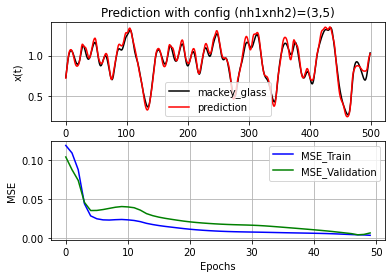

In [ ]:
from matplotlib.animation import FuncAnimation


agent = Agent()
Prediction = []
LOSS_Train =[]
LOSS_Validation =[]

Xpatterns_train = torch.tensor(patterns_train,dtype=torch.float)
Ytargets_train = torch.tensor(targets_train,dtype=torch.float)
Xpatterns_validation = torch.tensor(patterns_val,dtype=torch.float)
Ytarget_validation = torch.tensor(targets_val,dtype=torch.float)

nb_epoch = 50
loss_over_epoch_train = []
loss_over_epoch_validation = []

iteration_nb = 10
Courbes = np.zeros((iteration_nb,patterns_train.shape[1]))
Courbe_global=[]
MSEs_train = np.zeros((iteration_nb,nb_epoch))
MSE_global_train = []
MSEs_validation = np.zeros((iteration_nb,nb_epoch))
MSE_global_validation = []

for iterations in range(iteration_nb):
    for epoch in range(nb_epoch):
        LOSS_Train = []
        LOSS_Validation = []
        for id in range(len(patterns_train[0])):

            #Loss train set
            out_train = agent.NN.forward(Xpatterns_train[:,id])
            loss = agent.backward(Ytargets_train[:,id],out_train)
            LOSS_Train.append(loss.detach().numpy())

            #Loss Validation set
            out_validation = agent.NN.forward(Xpatterns_validation[:,id])
            LOSS_Validation.append(torch.nn.functional.mse_loss(Ytarget_validation[:,id],out_validation).detach().numpy())

        loss_over_epoch_train.append(np.mean(LOSS_Train))
        loss_over_epoch_validation.append(np.mean(LOSS_Validation))
    MSEs_train[iterations,:] = loss_over_epoch_train[-nb_epoch:]
    MSEs_validation[iterations,:] = loss_over_epoch_validation[-nb_epoch:]

        
        

    for id in range(len(patterns_val[0])):
        out = agent.NN.forward(Xpatterns_validation[:,id])
        Prediction.append(out.detach().numpy())
    print(np.shape(Courbes),np.shape(Prediction))
    Courbes[iterations,:] = np.transpose(Prediction[-500:])
    

Courbe_global = np.mean(Courbes,axis=0)
#print(np.shape(Courbe_global))
MSE_global_train = np.mean(MSEs_train,axis=0)
MSE_global_validation = np.mean(MSEs_validation,axis=0)
#print(np.shape(MSE_global_train))

plt.figure()

plt.subplot(2,1,1)
plt.plot(targets_val[0,:], 'black')
plt.plot(Courbe_global, 'red')
plt.xlabel("t")
plt.ylabel("x(t)")
plt.grid(True)
plt.legend(["mackey_glass","prediction"])
plt.title("Prediction with config (nh1xnh2)=(4,4)")
plt.subplot(2,1,2)
#plt.plot(MSE_global_train,"blue")
#plt.plot(MSE_global_validation,"green")
plt.plot(MSEs_train[0,:],"blue")
plt.plot(MSEs_validation[0,:],"green")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend(["MSE_Train","MSE_Validation"])
plt.grid(True)
plt.savefig("nh1=4_nh2=4.png")


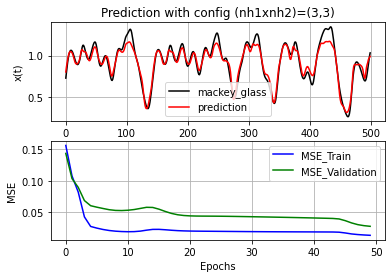

In [ ]:
plt.figure()

plt.subplot(2,1,1)
plt.plot(targets_val[0,:], 'black')
plt.plot(Courbe_global, 'red')
plt.xlabel("t")
plt.ylabel("x(t)")
plt.grid(True)
plt.legend(["mackey_glass","prediction"])
plt.title("Prediction with config (nh1xnh2)=(3,3)")
plt.subplot(2,1,2)
#plt.plot(MSE_global_train,"blue")
#plt.plot(MSE_global_validation,"green")
plt.plot(MSEs_train[0,:],"blue")
plt.plot(MSEs_validation[0,:],"green")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend(["MSE_Train","MSE_Validation"])
plt.grid(True)
plt.savefig("nh1=3_nh2=3.png")

In [ ]:


import matplotlib.animation as ani

# creating a plot
def AnimationFunction(frame):
    if frame == 1 :
        plt.plot(t[n_train:n_val], targets_val[0,:], 'black')
        plt.plot(t[n_train:n_val], Prediction[1:len(targets_val[0,:])+1],'red')
    elif frame ==  nb_epoch-1:
        plt.plot(t[n_train:n_val], targets_val[0,:], 'black')
        plt.plot(t[n_train:n_val], Prediction[len(targets_val[0,:])*frame:len(Prediction)],'red')
    else : 
        plt.plot(t[n_train:n_val], targets_val[0,:], 'black')
        plt.plot(t[n_train:n_val], Prediction[len(targets_val[0,:])*frame:len(targets_val[0,:])*(frame+1)],'red')
    plt.grid(True)
    


animation_1 = ani.FuncAnimation(plt.gcf(),AnimationFunction,interval=1)
animation_1.save('test.gif')


NameError: name 'nb_epoch' is not defined

<Figure size 432x288 with 0 Axes>

Text(0, 0.5, 'x(t)')

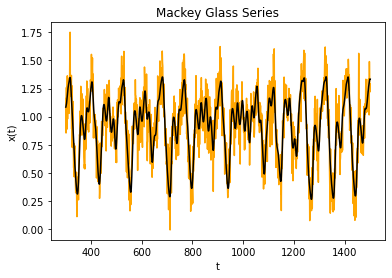

In [ ]:
# Part 2 - Noisy data
import numpy as np
x = mackey_glass(1506)
noise = np.random.normal(0,0.15,size=x.shape)
x_noisy = x + noise
patterns_noisy = np.array([x_noisy[t-lag] for lag in [20,15,10,5,0]])

t = np.arange(301, 1501)
plt.plot(t, x_noisy[t], 'orange')
plt.plot(t, x[t], 'black')
plt.title("Mackey Glass Series with gaussian noise (0,0.15)")
plt.xlabel("t")
plt.ylabel("x(t)")
